In [12]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from scipy import optimize
from writeit import rewritePipes

Populating the interactive namespace from numpy and matplotlib


In [13]:
fi = "../indata/Alamedanewer2.0.inp"
fc = "../indata/Alamedanewer2.0.config"
n0 = PyNetwork(fi,fc,1)
m_per_ft = .3048
elevs  =[417,414,324,300,275,256,232,201,177,190,192,197,199,206,209,240,252,250,283,289,316,315,334,340,334,332,333,341,387,426,417]

In [14]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

In [26]:
#n0.showLayout()
Ls_m = [l*m_per_ft for l in n0.Ls]
elevs_m = [float(el)*m_per_ft for el in elevs]
elevs_m = [0*el for el in elevs_m]
Ds_m = [D/12 for D in n0.Ds]
Ds_m[17 ]=Ds_m[16]
T = 0.01
Np = n0.Nedges
a = 100
Ns = [int(l) for l in Ls_m]
dx = [Ls_m[i]/Ns[i] for i in range(Np)]
M = int(T*a/(max(dx)*.8))
jt = n0.nodeTypes
Nn = len(jt)
bt = [1]*Nn
bv = [0.]*Nn
r = [1]*Nn
r[0] = 0
bt[0] =1
h0s = [0]*Np
q0s = [0]*Np
Mrs =[0.00]*Np
fn = "../indata/Alameda_m3"
oldinp = "../indata/Alamedanewer2.0.inp"
(fi, fc) = rewritePipes(fn,oldinp, Ns, Ls_m, Mrs, Ds_m, jt, bt, bv, r, h0s, q0s, T, M, a,elevs_m)
n1 = PyNetwork(fi,fc,1)
dt = n1.T/float(n1.M)
Q00 = 0.0087
for i in range(0,Np):
    A0 = 0.00*ones(n1.Ns[i])
    Q0 = 0.*np.ones(n1.Ns[i])
    if(i==17):
        A0[-1] = 0.001
    #elif(i==16):
    #    A0[0] =0.001
    n1.setIC(i,A0,Q0)
#for i in range(0,16):
#    A0 = 0.001*ones(n1.Ns[i])
#    Q0 = 0.*np.ones(n1.Ns[i])
#    n1.setIC(i,A0,Q0)
Qb = Q00*np.ones(M+1)
n1.setbVal(0,Qb)
print dt
print elevs_m[15:19]
print M


new files are ../indata/Alameda_m3.inp and ../indata/Alameda_m3.config
0.01
[0.0, 0.0, 0.0, 0.0]
1


In [27]:
%%time
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)
Vf = n1.getTotalVolume()
dV = Vf-V0
Vs =[Vf]
print "dV = %f" %dV

dV = 0.000291
CPU times: user 500 µs, sys: 81 µs, total: 581 µs
Wall time: 584 µs


In [17]:
Hlong = []
for i in range(Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    Nstar = 1
    Hlong.append([n1.qhist(i)[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)])

In [24]:
n1.showLayout()
print dt

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  2         | 3
     3  |  3         | 4
     4  |  4         | 5
     5  |  5         | 6
     6  |  6         | 7
     7  |  7         | 8
     8  |  8         | 9
     9  |  9         | 10
     10  |  10         | 11
     11  |  11         | 12
     12  |  12         | 13
     13  |  13         | 14
     14  |  14         | 15
     15  |  15         | 16
     16  |  16         | 17
     17  |  16         | 18
     18  |  19         | 18
     19  |  18         | 20
     20  |  20         | 21
     21  |  20         | 22
     22  |  23         | 22
     23  |  22         | 24
     24  |  24         | 25
     25  |  25         | 26
     26  |  26         | 27
     27  |  27         | 28
     28  |  28         | 29


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  2
  2     |  2
  3     |  2
  4     |  2
  5     |  2
  6     |  2
  7 

In [29]:
J = 19
qh = n1.q(J)
print qh
print max(n1.qhist(17))

[  8.64932517e-07   3.09464662e-09   7.59420426e-12   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   6.63559670e-07   2.37634146e-09   5.83490199e-12
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
0.001


23686
31
0.686492676772
2.10657214222


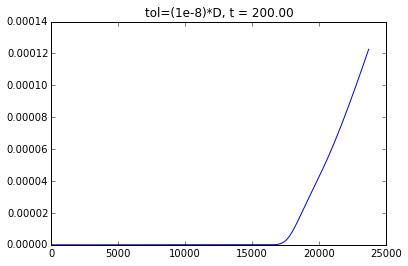

In [23]:
n  = M
print n
J = 20
print n1.Ns[16]
hh=4
#plot([n1.qhist(J)[idx_t(0,k+1,n,n1.Ns[J])] for k in range(n1.Ns[J])])

plot([n1.qhist(J)[idx_t(0,1,n,n1.Ns[J])] for n in range(M+1)])
title('tol=(1e-8)*D, t = %.2f'%T)
#for hh in range(0,n1.Ns[J]+1):
#    print "%.2e  %.2e"%(n1.qhist(J)[idx_t(0,hh,n,n1.Ns[J])],n1.qhist(J)[idx_t(1,hh,n,n1.Ns[J])])
    
print max(n1.cmax)*dt/min(dx)
#print n1.cmax
print n1.cmax[10]

In [8]:
T2 = T/2
M2 = M/2
dt2 = T2/float(M2)
(fi, fc) = rewritePipes(fn,oldinp, Ns, Ls_m, Mrs, Ds_m, jt, bt, bv, r, h0s, q0s, T2, M2, a,elevs_m)
n2 = PyNetwork(fi,fc,1)
Q00 = 0.0087
for i in range(0,Np):
    A0 = 0.00*ones(n2.Ns[i])
    Q0 = 0.*np.ones(n2.Ns[i])
    n2.setIC(i,A0,Q0)
Qb = Q00*np.ones(M2+1)
n2.setbVal(0,Qb)
print M2
print T2
print dt2
print dt

new files are ../indata/Alameda_m3.inp and ../indata/Alameda_m3.config
5210
11
0.0021113243762
0.0021113243762


In [10]:
%%time
V0 = n2.getTotalVolume()
n2.runForwardProblem(dt2)
Vf = n2.getTotalVolume()
dV = Vf-V0
Vs =[Vf]
print "dV = %f" %dV
print dV*2

dV = 0.111925
0.223850249516
CPU times: user 2.15 s, sys: 581 µs, total: 2.15 s
Wall time: 2.15 s


In [11]:
Hshort1 = []
for i in range(Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M2, a)
    Nstar = 1
    Hshort1.append([n2.qhist(i)[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M2+1)])

In [12]:
n2.reset()
n2.runForwardProblem(dt2)

In [13]:
print n2.getTotalVolume()
Hshort2 = []
for i in range(Np):
    Nstar = 1
    Hshort2.append([n2.qhist(i)[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(0,M2+1)])

0.219267754846


In [14]:
t = linspace(0,20,2*(M2+1))
j = 0
for j in range(Np):
    err =Hlong[j][0:M]-np.concatenate((Hshort1[j], Hshort2[j]))
    print norm(err)
    plot(err)

ValueError: operands could not be broadcast together with shapes (10420,) (10422,) 

In [ ]:
print n2.getTotalVolume()
print n1.getTotalVolume()
print len(np.concatenate((Hshort1[0],Hshort2[0])))
print len(Hlong[0])

In [ ]:
%%time
MM=1
Ttot = T
for m in range(MM):
    A0s = []
    Q0s = []
    Empty=[]
    for j in range(0,Np):
        qj =n2.q(j)
        A0s.append(np.copy(qj[0:n2.Ns[j]]))
        Q0s.append(np.copy(qj[n2.Ns[j]:]))
        if sum(A0s[j])<1e-4:
            Empty.append(j)
    (fi, fc) = rewritePipes(fn,oldinp, Ns, Ls_m, Mrs, Ds_m, jt, bt, bv, r, h0s, q0s, T2, M2, a,elevs_m)
    n3 = PyNetwork(fi,fc,1)
    for j in range(0,Np):
        A0 = A0s[j]
        Q0 = Q0s[j]
        n3.setIC(j,A0,Q0)
    Qb = Q00*np.ones(M+1)
    n3.setbVal(0,Qb)
    #V0 = n2.getTotalVolume()
    #n2.runForwardProblem(dt2)
    #Vf= n2.getTotalVolume()
    #Vs.append(Vf)
    #Ttot+=T
    ##print "T =%f, Volume = %f"%(Ttot,Vf)
    #print "Empty Pipes are"
    #print Empty

In [21]:
print Hshort2[0][0]

0.0


T = 10.00


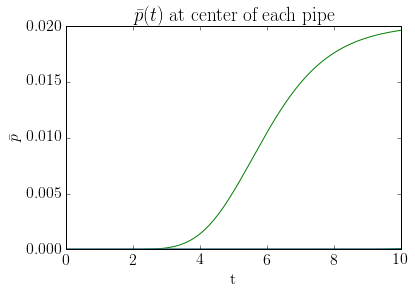

In [14]:
rc('text', usetex=True)        #for tex rendering. 
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 
                                'monospace': ['Computer Modern Typewriter'], 'size'   : 16})
from matplotlib import cm
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=Np+1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean') )
print "T = %.2f"%T
for i in range(0,Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    #ah = []
    #print i|
    #for n in range(M+1):
    #    ah.append([qf[idx_t(0,j,n,Ns[i])] for j in range(Ns[i])])
    #print (find(ah<0))
    Nstar = n1.Ns[i]/2
    cval = scalarMap.to_rgba(i)
    Af = (n1.Ds[i]**2)/(pi*4)
    A= [qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)];
    H=[p0.pbar(qf[idx_t(0,Nstar,n,n1.Ns[i])],False) for n in range(M+1)]
    t = linspace(0,T,M+1)
    plot(t,H, color = cval,label= "pipe %d"%i)
#legend(loc='upper left')
#ylim(0,1)
xlabel('t')
ylabel(r'$\bar{p}$')
title(r'$\bar{p}(t)$ at center of each pipe')

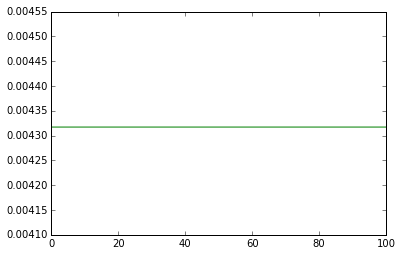

In [29]:

t = linspace(0,T,M+1)
for i in range(0,1):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    Nstar = 0
    cval = scalarMap.to_rgba(i)
    Af = (n0.Ds[i]**2)/(pi*4)
    Q=[qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)]
    plot(t,Q, color = cval,label= "pipe %d"%i)
#legend(loc='upper right')
#print H

In [25]:
dx =[n1.Ls[i]/n1.Ns[i] for i in range(Np)]
print max([a*dt/d for d in dx])

0.844451950684


In [18]:
pp = PyPipe_ps(n1.Ns[0],n1.Ds[0],n1.Ls[0],M,a)
print pp.AofH(10,True)
print pp.pbar(0.008,True)


0.00793018096379
18.6738789702


In [27]:
print n1.conn[16]
print n1.nodeTypes[16]

[17 16]
3


0.00785398163397
0.1


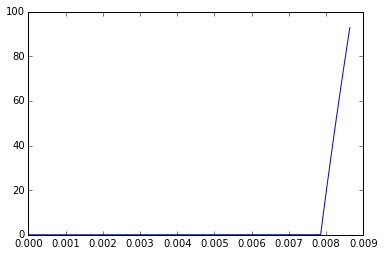

In [21]:
i = 1
p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
Af = (n1.Ds[i]**2)*pi/(4)
As = linspace(0,Af*1.1,100)
pbars= [p0.pbar(A,True) for A in As]
plot(As,pbars)
print Af
print n1.Ds[i]

In [30]:
dV = Vf-V0
print "dV = %f"%(dV)
print V0
print Vf

dV = -0.060104
0.27755
0.217446361768


In [32]:
print A0s[1]
print Q0s[10]

[ 0.0016467   0.00145512  0.0013167   0.00121088  0.00112667  0.00105766
  0.00099979  0.00095037  0.00090754  0.00086996  0.00083665  0.00080686
  0.00078001  0.00075565  0.00073342  0.00071304  0.00069424  0.00067685
  0.0006607   0.00064564  0.00063156  0.00061836  0.00060595  0.00059425
  0.0005832   0.00057275  0.00056283  0.00055341  0.00054444  0.00053589
  0.00052774  0.00051994  0.00051247  0.00050532  0.00049846  0.00049187
  0.00048553  0.00047943  0.00047356  0.00046789  0.00046242  0.00045714
  0.00045203  0.0004471   0.00044232  0.00043768  0.0004332   0.00042884
  0.00042462  0.00042051  0.00041653  0.00041265  0.00040888  0.00040521
  0.00040164  0.00039816  0.00039477  0.00039146  0.00038824  0.00038509
  0.00038202  0.00037902  0.00037609  0.00037323  0.00037043]
[ 0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087
  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087  0.0087
  0.0087  0.0087  0.0087  0.0087  0.0087]


In [19]:
q = n1.q(18)
print q

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
for i in range(0,Np):
    p0 = PyPipe_ps(n1.Ns[i], n1.Ds[i], n1.Ls[i], M, a)
    qf = n1.qhist(i)
    #ah = []
    #print i|
    #for n in range(M+1):
    #    ah.append([qf[idx_t(0,j,n,Ns[i])] for j in range(Ns[i])])
    #print (find(ah<0))
    Nstar = 2
    cval = scalarMap.to_rgba(i)
    Af = (n1.Ds[i]**2)/(pi*4)
    A= [qf[idx_t(0,Nstar,n,n1.Ns[i])] for n in range(M+1)];
    H=[p0.pbar(qf[idx_t(0,Nstar,n,n1.Ns[i])],False) for n in range(M+1)]
    t = linspace(0,T,M+1)
    plot(t,H, color = cval,label= "pipe %d"%i)

In [ ]:
qh = n1.qhist(0)
print [qh[idx_t(0,k,0,n1.Ns[i])] for k in range(35)]

In [ ]:
print n1.q(0)[35:]
print n1.q(0)[0:35]

In [64]:
A0s =[]
Q0s = []
A0s.append(np.copy(n1.q(0)[0:n1.Ns[0]]))
Q0s.append(np.copy(n1.q(0)[n1.Ns[0]:]))

35
